# Concevez une application au service de la santé publique

Objectifs: 
-  Traiter le jeu de données afin de repérer des variables pertinentes pour les traitements à venir. Automatiser ces traitements pour éviter de répéter ces opérations. Le programme doit fonctionner si la base de données est légèrement modifiée (ajout d’entrées, par exemple). 
- Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement. L’appel à projets spécifie que l’analyse doit être simple à comprendre pour un public néophyte. Soyez donc attentif à la lisibilité : taille des textes, choix des couleurs, netteté suffisante, et variez les graphiques (boxplots, histogrammes, diagrammes circulaires, nuages de points…) pour illustrer au mieux votre propos.
-  Confirmer ou infirmer les hypothèses  à l’aide d’une analyse multivariée. Effectuer les tests statistiques appropriés pour vérifier la significativité des résultats.
- Élaborer une idée d’application. Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.
- Rédiger un rapport d’exploration et pitcher votre idée durant la soutenance du projet.

# Idée d'application

Les recommandations du PNNS sont les suivantes:
- Au moins 5 fruits et légumes par jour
- Des féculents à chaque repas selon l’appétit
- 3 produits laitiers (lait, yaourt, fromage) par jour
- 1 à 2 portions de viande, œufs et produits de la pêche par jour
- Limiter les matières grasses ajoutées, le sucre et le sel

A partir d'un aliment scanné, proposer une sélection de yaourt et/ou fruit(s) pour se rapprocher, sur le repas, des recommandations de santé en termes des apports en macronutriments:

* nutriments
    - lipides 35-40% Apports en Energie Totaux
    - protides 10-20% AET
    - glucides 40-55% AET
    - fibres: 30g (environ 2-3% AET)

On va donc avoir besoin de renseignements concernant les apports nutritionnels et notamment l'énergie, les apports en protéines, lipides, glucides et fibres ainsi que les types d'aliments. Eventuellement, on pourra y ajouter le nutriscore et l'ecoscore pour pouvoir faire une sélection des produits les plus écologiques et sains (dans leur catégorie).

# Sommaire
### [II Analyse exploratoire](#II-Analyse-exploratoire)
__[II.1 Répartitions typiques de l'énergie et des macronutriments](#II.1-Répartitions-typiques-de-l'énergie-et-des-macronutriments)__\
[II.1.1 Répartition générale](#II.1.1-Répartition-générale)\
[II.1.2 Les catégories One-dish meals, Fruits et Milk and yogurt](#II.1.2-Les-catégories-One-dish-meals,-Fruits-et-Milk-and-yogurt)\
[II.1.3 Représentation des proportions de chaque macronutriment dans le bilan global](#II.1.3-Représentation-des-proportions-de-chaque-macronutriment-dans-le-bilan-global)\
[II.1.4 Association d'un macronutriment dominant avec un groupe de produits](#II.1.4-Association-d'un-macronutriment-dominant-avec-un-groupe-de-produits)\
__[II.2 Scores](#II.2-Scores)__\
[II.2.1 Score reflétant l'équilibre entre les macronutriments: EquiScore](#II.2.1-Score-reflétant-l'équilibre-entre-les-macronutriments:-EquiScore)\
[II.2.2 Distribution des valeurs du nutriscore](#II.2.2-Distribution-des-valeurs-du-nutriscore)\
[II.2.3 Analyse croisée des scores](#II.2.3-Analyse-croisée-des-scores)\
[II.2.4 EquiScore, Nutriscore et groupes d'aliments](#II.2.4-EquiScore,-Nutriscore-et-groupes-d'aliments)\
__[II.3 Analyse des corrélations](#II.3-Analyse-des-corrélations)__\
[II.3.1 Matrice des corrélations](#II.3.1-Matrice-des-corrélations)

# I Exploration du jeu de données et sélection des variables

## I.1 Chargement des données et sélection des variables

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as mticker
import statsmodels.api as sm
from statsmodels.formula.api import ols
import missingno as msno

# Module pour le scoring.
import functions_p3 as fp3

# II Analyse exploratoire

In [40]:
df1 = pd.read_csv("./df1_nomissing.csv")

## II.1 Répartitions typiques de l'énergie et des macronutriments

### II.1.1 Répartition générale

On commence par explorer les distributions associées aux différents macronutriments et à l'énergie sur le jeu de données global.

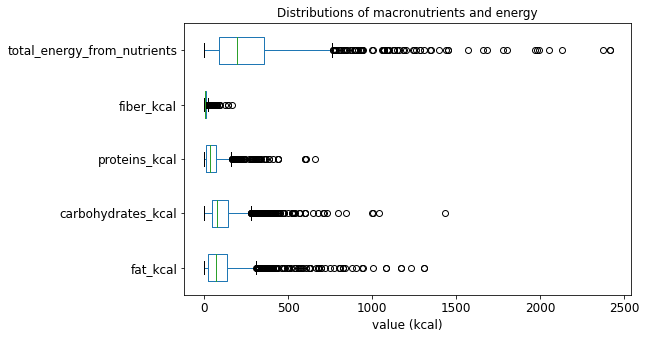

In [3]:
flierprops = {"marker":'o'}
ax=df1[["fat_kcal",
   "carbohydrates_kcal",
   "proteins_kcal",
   "fiber_kcal",
   "total_energy_from_nutrients"]].plot(kind="box",
                                        vert=False, 
                                        showfliers=True,
                                        flierprops=flierprops,
                                        fontsize=12,
                                        xlabel="value (kcal)",
                                        figsize=(8, 5),
                                        title="Distributions of macronutrients and energy")
ax.set_xlabel("value (kcal)", fontsize=12)
plt.show()

On exclu le point de valeurs les plus élevées: il semble être un outlier.

In [4]:
df1.iloc[df1.fat_kcal.idxmax()]

product_name                   Le cassoulet au confit de canard de Castelnaud...
categories_tags                en:canned-foods,en:meals,en:meat-based-product...
serving_quantity                                                            1580
pnns_groups_2                                                     One-dish meals
energy-kcal_100g                                                             153
fat_100g                                                                     9.2
nutrition-score-fr_100g                                                       -3
nutriscore_grade                                                               a
fiber_100g                                                                   4.7
proteins_100g                                                                9.5
carbohydrates_100g                                                           5.7
fat_kcal                                                                 1308.24
carbohydrates_kcal          

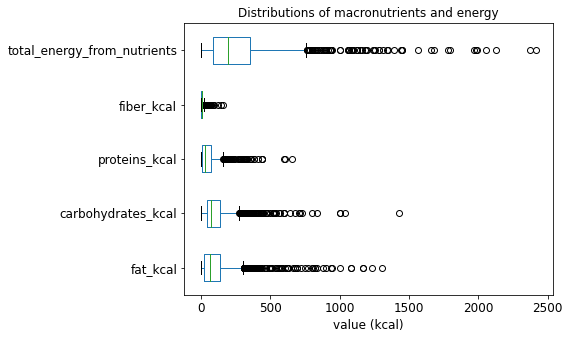

----------------------------------------
Moyennes en kcal des différentes valeurs nutritionnelles sur le dataset global:
fat_kcal                        92.906091
carbohydrates_kcal              97.947268
proteins_kcal                   45.083511
fiber_kcal                       6.851849
total_energy_from_nutrients    242.773643
dtype: float64
----------------------------------------
Médianes en kcal des différentes valeurs nutritionnelles sur le dataset global:
fat_kcal                        66.8925
carbohydrates_kcal              72.0000
proteins_kcal                   31.2000
fiber_kcal                       4.3700
total_energy_from_nutrients    194.0000
dtype: float64
Minima et maxima:
fat_kcal                       0.0
carbohydrates_kcal             0.0
proteins_kcal                  0.0
fiber_kcal                     0.0
total_energy_from_nutrients    0.0
dtype: float64
fat_kcal                       1231.776
carbohydrates_kcal             1430.000
proteins_kcal                 

In [5]:
outlier = df1.fat_kcal.idxmax()
df1.drop(index=outlier, inplace=True)

ax=df1[["fat_kcal",
   "carbohydrates_kcal",
   "proteins_kcal",
   "fiber_kcal",
   "total_energy_from_nutrients"]].plot(kind="box",
                                        vert=False, 
                                        showfliers=True,
                                        flierprops=flierprops,
                                        fontsize=12,
                                        xlabel="value (kcal)",
                                        figsize=(8, 5),
                                        title="Distributions of macronutrients and energy")
ax.set_xlabel("value (kcal)", fontsize=12)
plt.gcf().subplots_adjust(left=0.35, right=0.99)
plt.savefig("./graphes/general_distrib.png")
plt.show()

print("-"*40)
print("Moyennes en kcal des différentes valeurs nutritionnelles sur le dataset global:")
print(df1[["fat_kcal",
   "carbohydrates_kcal",
   "proteins_kcal",
   "fiber_kcal",
   "total_energy_from_nutrients"]].mean())
print("-"*40)
print("Médianes en kcal des différentes valeurs nutritionnelles sur le dataset global:")
print(df1[["fat_kcal",
   "carbohydrates_kcal",
   "proteins_kcal",
   "fiber_kcal",
   "total_energy_from_nutrients"]].median())
print("Minima et maxima:")
print(df1[["fat_kcal",
   "carbohydrates_kcal",
   "proteins_kcal",
   "fiber_kcal",
   "total_energy_from_nutrients"]].min())
print(df1.drop(index=df1.fat_kcal.idxmax())[["fat_kcal",
   "carbohydrates_kcal",
   "proteins_kcal",
   "fiber_kcal",
   "total_energy_from_nutrients"]].max())

Maintenant les valeurs typiques, sans les outliers.

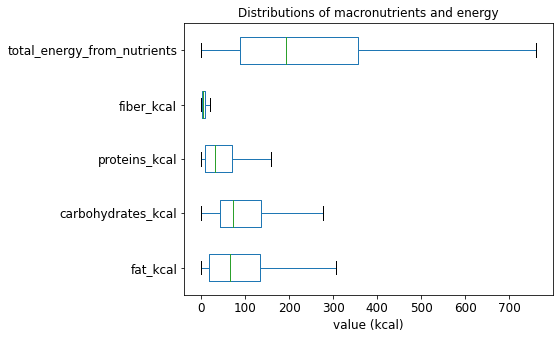

In [6]:
ax=df1[["fat_kcal",
   "carbohydrates_kcal",
   "proteins_kcal",
   "fiber_kcal",
   "total_energy_from_nutrients"]].plot(kind="box",
                                        vert=False, 
                                        showfliers=False,
                                        flierprops=flierprops,
                                        fontsize=12,
                                        xlabel="value (kcal)",
                                        figsize=(8, 5),
                                        title="Distributions of macronutrients and energy")
ax.set_xlabel("value (kcal)", fontsize=12)
plt.gcf().subplots_adjust(left=0.35, right=0.99)
plt.savefig("./graphes/general_distrib.png", dpi=300)
plt.show()

### II.1.2 Les catégories One-dish meals, Fruits et Milk and yogurt

Combien de représentants de chaque catégorie?

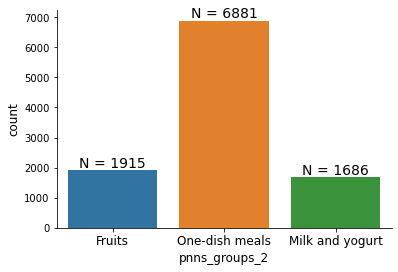

In [7]:
fig, ax = plt.subplots()
sns.countplot(x="pnns_groups_2",
              data=df1,
              ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
#ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
ax.set_xlabel(ax.get_xlabel(), fontsize=12)
ax.set_ylabel(ax.get_ylabel(), fontsize=12)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate("N = {:.0f}".format(y), (x.mean(), y), 
            ha='center', va='bottom', fontsize=14) # set the alignment of the text
sns.despine(ax=ax)
plt.savefig("./graphes/categories.png", dpi=300)
plt.show()

Les One-dish meals sont largement surreprésentés par rapport aux deux autres catégories. Il faudra savoir en tenir compte. En attendant, regardons comment leur composition diffère.

### II.1.3 Représentation des proportions de chaque macronutriment dans le bilan global

On commence par créer un dataframe regroupant les valeurs moyennes des macronutriments pour chaque groupe d'aliment. Comme les ANC ne reposent que sur les répartitions en lipides, glucides et protéines (les fibres étant comptées à part), on ne fera reposer l'analyse qui suit que sur les répartitions de ces macronutriments.

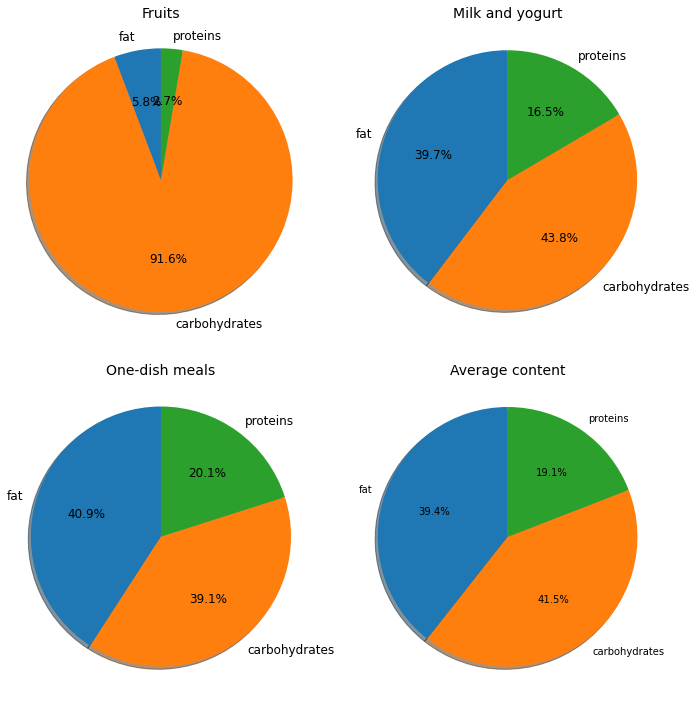

In [8]:
# On groupe les valeurs par catégorie d'aliment.
gr = df1.groupby("pnns_groups_2")[["fat_kcal", "carbohydrates_kcal", "proteins_kcal"]].mean()

# A titre de comparaison, on récupère aussi les valeurs moyennes sur l'ensemble du dataset.
gen = df1[["fat_kcal", "carbohydrates_kcal", "proteins_kcal"]].mean()

# On représente ces valeurs moyennes sous forme de proportion au bilan global pour chaque groupe d'aliment.
# Représentation sous forme de pie chart
labels = ["fat", "carbohydrates","proteins"]

# placement des titres
pad=0

# Taille de la police
fs = 14

txtprs = {"fontsize":12}

fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax1.pie(gr.loc["Fruits"], textprops=txtprs, labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Fruits", pad=pad, fontsize=fs)

ax2.pie(gr.loc["Milk and yogurt"], textprops=txtprs, labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title("Milk and yogurt", pad=pad, fontsize=fs)

ax3.pie(gr.loc["One-dish meals"], textprops=txtprs, labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax3.set_title("One-dish meals", pad=pad, fontsize=fs)

ax4.pie(gen, labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90)
ax4.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax4.set_title("Average content", pad=pad, fontsize=fs)


plt.tight_layout(pad=1.5)
plt.savefig("./graphes/pies.png")
plt.show()

Average content très proche de One-dish meals. Pas si étonnant si on regarde le nombre de one-dish meals par rapport aux autres groupes. A titre de comparaison, voici la répartition obtenue si on respecte les ANC:

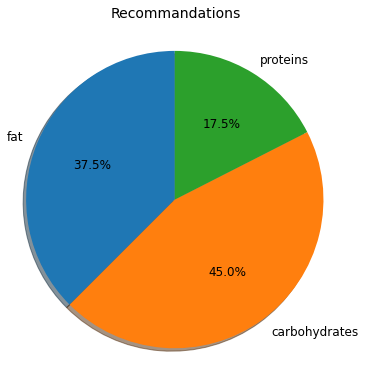

In [41]:
# Valeurs idéales
p_fat = 37.5 # fourchette de 35% à 40%
p_carbs = 45 # fourchette de 40% à 55%
p_prot = 17.5 # fourchette de 15% à 20%

anc = [p_fat, p_carbs, p_prot]
labels = ["fat", "carbohydrates","proteins"]
txtprs = {"fontsize":12}

fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(anc, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90, textprops=txtprs)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title("Recommandations", pad=20, fontsize=14)
plt.savefig("./graphes/anc.png")
plt.show()

Le contenu moyen est très proche des valeurs recommandées, mais on peut déjà envisager l'utilité de ccombiner des plats de différentes natures pour parvenir à un meilleur équilibre.

### II.1.4 Association d'un macronutriment dominant avec un groupe de produits

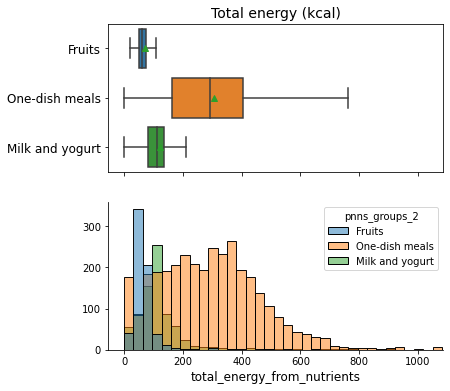

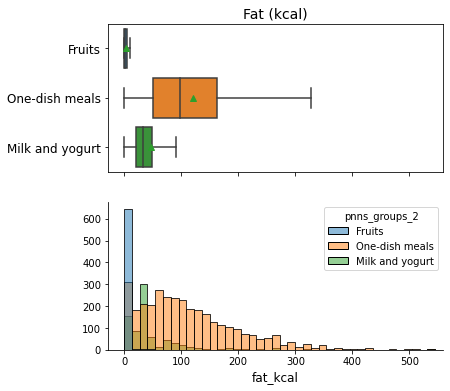

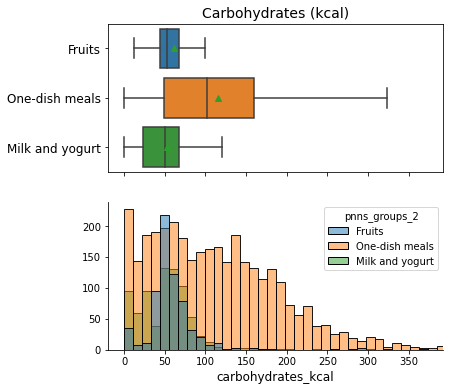

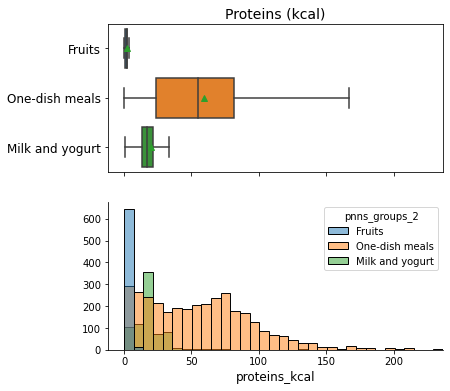

In [42]:
nutricols = ["total_energy_from_nutrients", "fat_kcal", "carbohydrates_kcal", "proteins_kcal"]
titles = {"total_energy_from_nutrients": "Total energy (kcal)",
          "fat_kcal": "Fat (kcal)",
          "carbohydrates_kcal": "Carbohydrates (kcal)",
          "proteins_kcal": "Proteins (kcal)"
         }

for c in nutricols:
    q = df1.groupby("pnns_groups_2")[c].quantile(0.99).max()
    fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(6, 6), sharex=True)
    sns.boxplot(x=c,
                y="pnns_groups_2",
                data=df1,
                showfliers=False,
                showmeans=True,
                #palette="viridis",
                ax=ax1)
    ax1.set_xlabel("")
    ax1.set_ylabel("")
    ax1.tick_params(axis='y', labelsize=12)
    #ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=12)
    ax1.set_xlim([-q/20, q])
    ax1.set_title(titles[c], fontsize=14)
    
    sns.histplot(x=c,
                 data=df1,
                 hue="pnns_groups_2",
                 ax=ax2
            )
    ax2.set_xlim([-q/20, q])
    ax2.set_xlabel(ax2.get_xlabel(), fontsize=12)
    ax1.tick_params(axis='x', labelsize=12)
    #ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=12)
    ax2.set_ylabel("")
    #ax2.set_yticklabels(ax2.get_yticklabels(), fontsize=10)
    sns.despine(ax=ax2)
    plt.tight_layout
    plt.show()

Chaque groupe d'aliment est associé à une présence plus forte, en moyenne, d'un ou plusieurs macronutriments. On peut ainsi effectuer les rapprochements suivants, sur la base des quelques analyses réalisées ci-dessus:
- les One-dish meals sont en général les produits les plus énergétiques, et constituent la source majeure de lipides et de protéines,
- Les Fruits sont en général la source majeure de fibres et de glucides,
- Les Milk and yogurt consituent une source intermédiare de lipides et de protéines, mais sont pauvres en glucides et en fibres.

Les recommandations de l'application pourront reposer sur ces constatations pour proposer, en association avec un one-dish meal d'un score donné, le meilleur "type" de produit en fonction des apports à réduire ou à augmenter dans la balance globale.

## II.2 Scores

### II.2.1 Distance reflétant le (dés)équilibre entre les macronutriments: EquiScore

Pour pouvoir réaliser notre idée d'application, il est nécessaire d'avoir un indicateur qui renseigne sur l'écart d'un produit aux valeurs idéales, en terme de fraction du contenu global. On choisit ainsi d'utiliser la distance euclidienne entre la composition d'un produit donné et la composition idéale.

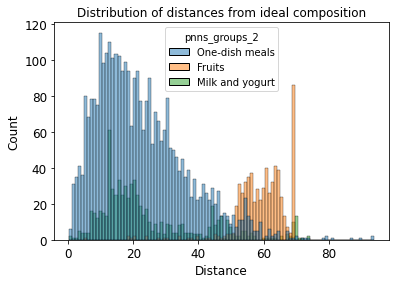

Some statistics about the distribution of distance from ideal composition:

All data:
Minimum: 0.33
Maximum: 93.81
Mean: 27.96
Median: 22.34
Standard deviation: 18.50
----------------------------------------
One-dish meals:
Minimum: 0.33
Maximum: 93.81
Mean: 22.45
Median: 19.93
Standard deviation: 13.76
----------------------------------------
Fruits:
Minimum: 5.65
Maximum: 68.83
Mean: 59.42
Median: 60.43
Standard deviation: 7.92
----------------------------------------
Milk and yogurt:
Minimum: 0.85
Maximum: 74.25
Mean: 25.34
Median: 19.70
Standard deviation: 16.40


In [43]:
X = df1.copy()
# On écarte les lignes pour lesquelles toutes les variables valent 0
zeros = X[["fat_kcal", "carbohydrates_kcal", "proteins_kcal"]].sum(axis=1)==0
drop_index = zeros[zeros].index

X.drop(index=drop_index, inplace=True)

# On crée les nouvelles colonnes "fat_ratio", "carbohydrates_ratio" et "proteins_ratio" qui renseigneront sur 
# les ratio de macronutriments dans les contenus globaux.
X.loc[:, "fat_ratio"] = X.apply(lambda x: 100*x["fat_kcal"]/(x["fat_kcal"]+x["carbohydrates_kcal"]+x["proteins_kcal"]), axis=1)
X.loc[:, "carbohydrates_ratio"] = X.apply(lambda x: 100*x["carbohydrates_kcal"]/(x["fat_kcal"]+x["carbohydrates_kcal"]+x["proteins_kcal"]), axis=1)
X.loc[:, "proteins_ratio"] = X.apply(lambda x: 100*x["proteins_kcal"]/(x["fat_kcal"]+x["carbohydrates_kcal"]+x["proteins_kcal"]), axis=1)

sc = fp3.score(X["fat_ratio"], X["carbohydrates_ratio"], X["proteins_ratio"], method="sq")

# Nouvelle colonne "score" dans le dataframe
X.loc[:, "score"] = sc
X.head()

# mise à jour du dataframe
df1 = X

# fontsize
fs=12

fig, ax = plt.subplots()
# Affichage de la distribution de l'equiscore
sns.histplot(x="score",
            data=X,
             hue="pnns_groups_2",
             bins=101,
             ax=ax
           )
plt.title("Distribution of distances from ideal composition", fontsize=fs)
plt.xlabel("Distance", fontsize=fs)
plt.ylabel("Count", fontsize=fs)
ax.tick_params(axis='y', labelsize=fs)
ax.tick_params(axis='x', labelsize=fs)
plt.savefig("./graphes/distances.png")
plt.show()

print("Some statistics about the distribution of distance from ideal composition:\n")
print("All data:")
print("Minimum: {:.2f}".format(X["score"].min()))
print("Maximum: {:.2f}".format(X["score"].max()))
print("Mean: {:.2f}".format(X["score"].mean()))
print("Median: {:.2f}".format(X["score"].median()))
print("Standard deviation: {:.2f}".format(X["score"].std()))
for i in X.pnns_groups_2.unique():
    print("-"*40)
    print(i+":")
    print("Minimum: {:.2f}".format(X.loc[X.pnns_groups_2==i, ["score"]].min()[0]))
    print("Maximum: {:.2f}".format(X.loc[X.pnns_groups_2==i, ["score"]].max()[0]))
    print("Mean: {:.2f}".format(X.loc[X.pnns_groups_2==i, ["score"]].mean()[0]))
    print("Median: {:.2f}".format(X.loc[X.pnns_groups_2==i, ["score"]].median()[0]))
    print("Standard deviation: {:.2f}".format(X.loc[X.pnns_groups_2==i, ["score"]].std()[0]))




Les distribution de distance pour les One-dish meals et les Milk and yogurt sont assez similaires. Elles diffèrent en revanche franchement de la distribution pour les fruits, dont les scores sont regroupés vers les valeurs les plus élevées. La distance est liée aux "excès" ou de façon équivalente aux "carences" d'une composition vis-à-vis de la composition idéale. On va donc continuer d'explorer nos données en se concentrant sur les excès en chacun des macronutriments.

In [44]:
X = df1.copy()

# On crée trois nouvelles colonnes: "fat_excess", "carbohydrates_excess", "proteins_excess"
nutrient_cols = ["fat_excess", "carbohydrates_excess", "proteins_excess"]
X.loc[:, "fat_excess"] = X["fat_ratio"] - p_fat
X.loc[:, "carbohydrates_excess"] = X["carbohydrates_ratio"] - p_carbs
X.loc[:, "proteins_excess"] = X["proteins_ratio"] - p_prot

# On crée trois nouvelles colonnes: "fat_excess", "carbohydrates_excess", "proteins_excess"
nutrient_cols = ["fat_excess", "carbohydrates_excess", "proteins_excess"]


# On peuple les colonnes "max_excess" et "min_excess" par le nom du macronutriment associé à l'excès le plus 
# élevé en valeur algébrique, c'est-à-dire qu'un excès négatif représente une carence.
X.loc[:, "max_excess"] = X[nutrient_cols].apply(lambda x: x.idxmax(), axis=1)
X.loc[:, "min_excess"] = X[nutrient_cols].apply(lambda x: x.idxmin(), axis=1)
X.loc[:, "max_excess_value"] = X[nutrient_cols].apply(lambda x: x.max(), axis=1)
X.loc[:, "min_excess_value"] = X[nutrient_cols].apply(lambda x: x.min(), axis=1)

# mise à jour du dataframe
df1 = X

df1.head()

,product_name,categories_tags,serving_quantity,pnns_groups_2,energy-kcal_100g,fat_100g,nutrition-score-fr_100g,nutriscore_grade,fiber_100g,proteins_100g,...,carbohydrates_ratio,proteins_ratio,score,fat_excess,carbohydrates_excess,proteins_excess,max_excess,min_excess,max_excess_value,min_excess_value
3,Salade fusili,"en:meals,en:pasta-dishes,en:salads,en:prepared...",215.0,One-dish meals,125.000000,3.500000,-2.0,a,1.3,6.70000,...,52.016461,22.057613,14.281518,-11.574074,7.016461,4.557613,carbohydrates_excess,fat_excess,7.016461,-11.574074
4,Coleslaw,"en:meals,en:starters,en:coleslaw",150.0,One-dish meals,155.000000,12.500000,1.0,b,2.5,1.10000,...,21.910488,2.939212,46.504702,37.650301,-23.089512,-14.560788,fat_excess,carbohydrates_excess,37.650301,-23.089512
5,Chicken Burritos,"en:meals,en:salads,en:prepared-salads",306.0,One-dish meals,202.020202,6.060606,3.0,c,0.9,10.10101,...,52.040816,20.408163,12.530471,-9.948980,7.040816,2.908163,carbohydrates_excess,fat_excess,7.040816,-9.948980
6,Salade Fusilli poulet tartare de légumes,"en:meals,en:pasta-dishes,en:salads,en:prepared...",265.0,One-dish meals,99.200000,2.300000,-3.0,a,1.7,5.60000,...,54.679285,23.554154,19.439198,-15.733438,9.679285,6.054154,carbohydrates_excess,fat_excess,9.679285,-15.733438
7,Salade Grecque,"en:meals,en:salads,en:prepared-salads",315.0,One-dish meals,93.400000,7.100000,3.0,c,1.0,5.10000,...,7.868852,22.295082,49.470558,32.336066,-37.131148,4.795082,fat_excess,carbohydrates_excess,32.336066,-37.131148


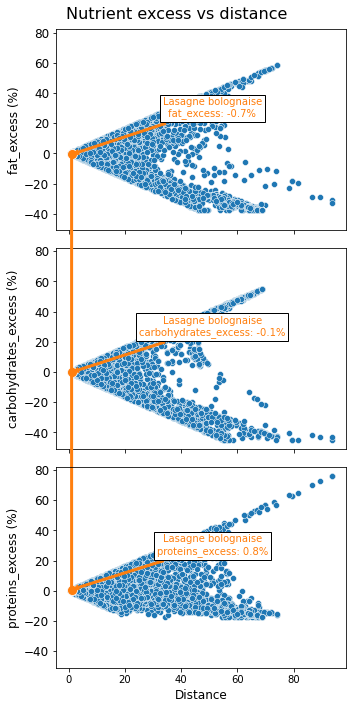

In [45]:
X = df1.copy()

from matplotlib.patches import ConnectionPatch

# placement du titre
pad = 12

# taille de la police
fs = 12

# choix d'un nombre aléatoire compris entre 0 et len(X)
np.random.seed(3)
r = np.random.choice(X[(X.score>20)&(X.score<40)].shape[0], 1)
product = X.iloc[r]

fig, axs = plt.subplots(nrows=len(nutrient_cols), figsize=(5, 10), sharex=True, sharey=True)
fig.suptitle("Nutrient excess vs distance", fontsize=16)
for i, nc in enumerate(nutrient_cols):
    ax=axs[i]
    sns.scatterplot(y=nc, 
                    x="score", 
                    data=X,
                    ax=ax)
    sns.scatterplot(y=nc, x="score", data=product, color="C1", s=100, ax=ax)
    ax.annotate(product["product_name"].iloc[0]+"\n"+nc+": {:.1f}%".format(product[nc].iloc[0]),
                (product["score"], product[nc]), 
                (product["score"]+50, 30),
                ha="center",
                va="center",
                color="C1",
               arrowprops = {"arrowstyle":"simple", "color":"C1"},
               bbox=dict(boxstyle="square,pad=0.3", fc="white", lw=1))
    ax.set_xlabel("Distance", fontsize=fs)
    ax.set_ylabel("{} (%)".format(nc), fontsize=fs)
    ax.tick_params(axis='y', labelsize=fs)
    #ax.set_yticklabels(ax1.get_yticklabels(), fontsize=12)
    #ax.set_xlim([-q/20, q])
    #ax.set_title(product["product_name"].iloc[0], fontsize=12, loc="right")

xyA = (product["score"],product[nutrient_cols[-1]])
xyB = (product["score"],product[nutrient_cols[0]])
coordsA = "data"
coordsB = "data"
con = ConnectionPatch(xyA=xyA, xyB=xyB, coordsA="data", coordsB="data",
                      axesA=axs[-1], axesB=axs[0], color="C1",
                     )
con.set_linewidth(3)
axs[-1].add_artist(con)
plt.tight_layout()
plt.savefig("./graphes/nutrient_distance.png")
plt.show()

On range les produits en 4 classes distinctes, correspondant aux 25ème, 50ème et 75ème percentiles, de manière à avoir 4 classes équilibrées. On nomme ces classes 1, 2, 3 et 4. Ainsi, on définit un score allant de 1 à 4, reflétant l'écart entre la composition d'un produit et la composition idéale, et qu'on nomme "equiscore".

In [14]:
X["score"].describe(percentiles=[0.25, 0.50, 0.75])

count    4594.000000
mean       27.961459
std        18.504310
min         0.334046
25%        13.446212
50%        22.333647
75%        39.689989
max        93.807787
Name: score, dtype: float64

In [46]:
# discrétisation du score
tranches = [0, 
            15, 
            25, 
            50
           ]
groups = np.digitize(X["score"], tranches)
X.loc[:, "equiscore"] = groups

df1 = X
df1.head()

,product_name,categories_tags,serving_quantity,pnns_groups_2,energy-kcal_100g,fat_100g,nutrition-score-fr_100g,nutriscore_grade,fiber_100g,proteins_100g,...,proteins_ratio,score,fat_excess,carbohydrates_excess,proteins_excess,max_excess,min_excess,max_excess_value,min_excess_value,equiscore
3,Salade fusili,"en:meals,en:pasta-dishes,en:salads,en:prepared...",215.0,One-dish meals,125.000000,3.500000,-2.0,a,1.3,6.70000,...,22.057613,14.281518,-11.574074,7.016461,4.557613,carbohydrates_excess,fat_excess,7.016461,-11.574074,1
4,Coleslaw,"en:meals,en:starters,en:coleslaw",150.0,One-dish meals,155.000000,12.500000,1.0,b,2.5,1.10000,...,2.939212,46.504702,37.650301,-23.089512,-14.560788,fat_excess,carbohydrates_excess,37.650301,-23.089512,3
5,Chicken Burritos,"en:meals,en:salads,en:prepared-salads",306.0,One-dish meals,202.020202,6.060606,3.0,c,0.9,10.10101,...,20.408163,12.530471,-9.948980,7.040816,2.908163,carbohydrates_excess,fat_excess,7.040816,-9.948980,1
6,Salade Fusilli poulet tartare de légumes,"en:meals,en:pasta-dishes,en:salads,en:prepared...",265.0,One-dish meals,99.200000,2.300000,-3.0,a,1.7,5.60000,...,23.554154,19.439198,-15.733438,9.679285,6.054154,carbohydrates_excess,fat_excess,9.679285,-15.733438,2
7,Salade Grecque,"en:meals,en:salads,en:prepared-salads",315.0,One-dish meals,93.400000,7.100000,3.0,c,1.0,5.10000,...,22.295082,49.470558,32.336066,-37.131148,4.795082,fat_excess,carbohydrates_excess,32.336066,-37.131148,3


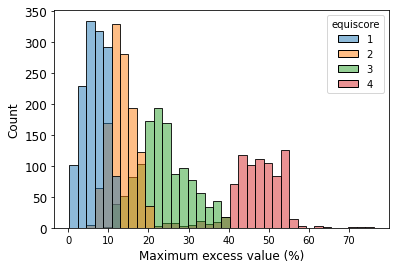

In [16]:
X = df1.copy()

fs = 12

fig, ax = plt.subplots()
sns.histplot(x="max_excess_value", 
             data=X.sort_values(by="equiscore"),  
             hue="equiscore",
             palette="tab10",
            ax=ax)
ax.set_xlabel("Maximum excess value (%)", fontsize=fs)
ax.set_ylabel("Count", fontsize=fs)
ax.tick_params(axis='y', labelsize=fs)
plt.savefig("./graphes/maxexcess_vs_equiscore.png")
plt.show()

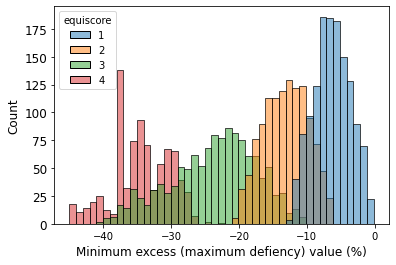

In [17]:
fs = 12

fig, ax = plt.subplots()

sns.histplot(x="min_excess_value", 
             data=X.sort_values(by="equiscore"), 
             bins=int(np.abs(X.min_excess_value).max()), 
             hue="equiscore",
             palette="tab10",
            ax=ax)
ax.set_xlabel("Minimum excess (maximum defiency) value (%)", fontsize=fs)
ax.set_ylabel("Count", fontsize=fs)
ax.tick_params(axis='y', labelsize=fs)
plt.savefig("./graphes/minexcess_vs_equiscore.png")
plt.show()

**Quelle est la relation entre l'equiscore et le type de macronutriments dont l'excès (la carence) est maximal(e) ? L'equiscore et le type de nutriment en excès sont-ils corrélés?**

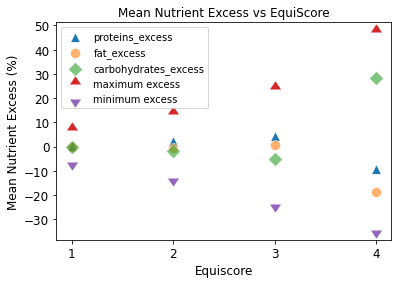

In [47]:
score_groups = X.groupby("equiscore").mean()
fig, ax = plt.subplots()

sns.scatterplot(x="equiscore", y="proteins_excess", data=score_groups, ax=ax, label="proteins_excess", marker="^", s=100)
sns.scatterplot(x="equiscore", y="fat_excess", data=score_groups, ax=ax, label="fat_excess", marker="o", s=100, alpha=0.60)
sns.scatterplot(x="equiscore", y="carbohydrates_excess", data=score_groups, ax=ax, label="carbohydrates_excess", marker="D", s=100, alpha=0.60)
sns.scatterplot(x="equiscore", y="max_excess_value", data = score_groups, ax=ax, label="maximum excess", marker=10, s=100)
sns.scatterplot(x="equiscore", y="min_excess_value", data = score_groups, ax=ax, label="minimum excess", marker=11, s=100)
ax.set_xlabel("Equiscore", fontsize=12)
ax.set_ylabel("Mean Nutrient Excess (%)", fontsize=12)
ax.set_title("Mean Nutrient Excess vs EquiScore", fontsize=12)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_xticks([1, 2, 3, 4])

plt.legend()

plt.savefig('./graphes/excess_equiscore.png', dpi=300)
plt.show()

Tableau de contingence:


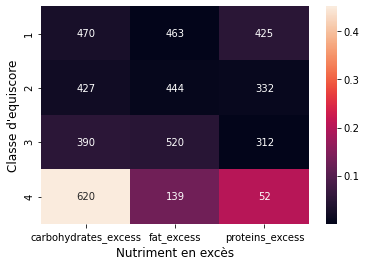

In [20]:
# Création du tableau de contingence
x = "equiscore"
y = "max_excess"

cont = X[[x,y]].pivot_table(index=x,columns=y,aggfunc=len,margins=True,margins_name="Total")
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = cont.loc["Total", "Total"]
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1], fmt=".0f")
plt.ylabel("Classe d'equiscore", fontsize=12)
plt.xlabel("Nutriment en excès", fontsize=12)
print("Tableau de contingence:")
plt.show()

Etant donné la valeur très élevée de la distance du khi-deux (> 3040), on en déduit l'existence d'une corrélation entre le type de nutriment le plus en excès et la classe d'equiscore.

En particulier:

- Dans la classe d'equiscore 4 les excès en glucides sont les excès principaux dans 67% des cas
- 40% des produits dont l'excès principal provient des glucides sont des produits de classe 4
- Dans cette même classe d'equiscore (4), les produits dont l'excès principal est un excès en protéines sont particulièrement sous-représentés: ils ne représentent que 9% des produits, tandis qu'ils représentent 22% des produits toutes catégories confondues.
- Enfin, les produits dont l'excès en protéines est le principal excès sont surreprésentés dans le groupe d'equiscore 1: ils représentent en effet 32% de l'ensemble des produits de classe 1.

La classe 1, associée aux produits les plus équilibrés par construction, est composée pour 1/3 de produits principalement "surchargés" en lipides, 1/3 en protéines, et 1/3 en glucides.

Tableau de contingence:


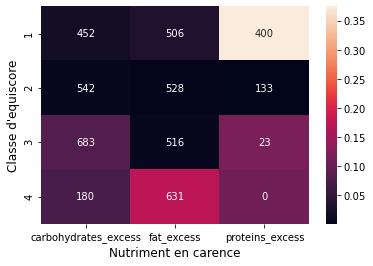

In [22]:
# Création du tableau de contingence
x = "equiscore"
y = "min_excess"

cont = X[[x,y]].pivot_table(index=x,columns=y,aggfunc=len,margins=True,margins_name="Total")
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = cont.loc["Total", "Total"]
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1], fmt=".0f")
plt.ylabel("Classe d'equiscore", fontsize=12)
plt.xlabel("Nutriment en carence", fontsize=12)
print("Tableau de contingence:")
plt.show()

Les produits de forte carence en protéines sont surreprésentés dans la classe d'equiscore a, les produits de fortes carences en glucides et lipides le sont dans les classe c et d, respectivement, où les produits carencés en protéines sont singulièrement sous-représentés.

### II.2.2 Distribution des valeurs du nutriscore

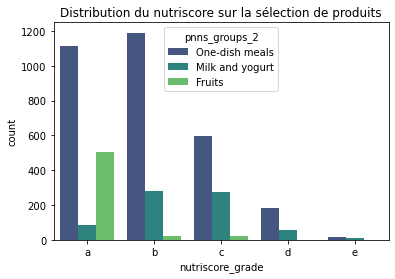

In [48]:
sns.countplot(x="nutriscore_grade",
            data=X.sort_values(by="nutriscore_grade"),
             palette="viridis",
             hue="pnns_groups_2")
plt.title("Distribution du nutriscore sur la sélection de produits")
plt.show()

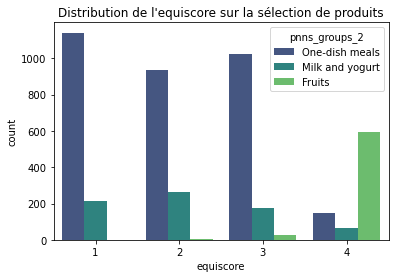

In [24]:
sns.countplot(x="equiscore",
            data=X.sort_values(by="equiscore"),
             palette="viridis",
             hue="pnns_groups_2")
plt.title("Distribution de l'equiscore sur la sélection de produits")
plt.show()

### II.2.3 Analyse croisée des scores

Il s'agit ici de regarder comment ces deux scores sont corrélés entre eux ou non. L'idée de l'application repose sur l'hypothèse que le nutriscore seul ne suffit pas pour sélectionner des produits dont la répartition des divers macronutriments se rapproche des ANC.

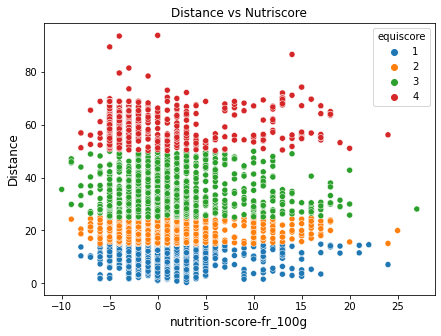

In [25]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x="nutrition-score-fr_100g",
                y="score",
                data=X.sort_values(by="equiscore"),
                hue="equiscore",
                palette="tab10"
               )
plt.title("Distance vs Nutriscore")
plt.xlabel("nutrition-score-fr_100g", fontsize=12)
plt.ylabel("Distance", fontsize=12)
plt.savefig("./graphes/equiscore_nutriscore.png", dpi=300)
plt.show()

**Test d'indépendance distance (equiscore) vs. nutriscore par ANOVA**

Commençons par afficher les distribution des distances associées à chaque nutriscore sous forme de boxplots

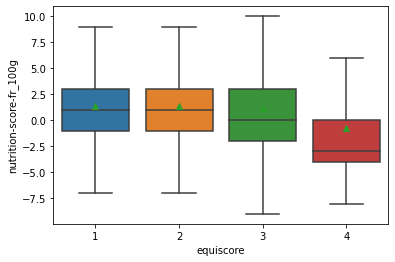

In [26]:
sns.boxplot(x="equiscore", 
            y="nutrition-score-fr_100g",
            data=X.sort_values(by="equiscore"),
            showmeans=True, 
            showfliers=False
           )

plt.show()

Difficile de comprendre exactement ce qu'il se passe ici. Affichons la distribution des nutrition score sour forme d'histogramme.

<AxesSubplot:xlabel='nutrition-score-fr_100g', ylabel='Count'>

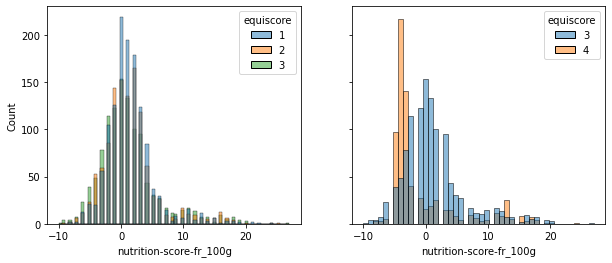

In [65]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4), sharex=True, sharey=True)

sns.histplot(x="nutrition-score-fr_100g", data=X[X.equiscore.isin([1, 2, 3])], hue="equiscore", palette="tab10", ax=ax1)
sns.histplot(x="nutrition-score-fr_100g", data=X[X.equiscore.isin([3, 4])], hue="equiscore", palette="tab10", ax=ax2)

Hypothèse: Les variables nutriscore et equiscore sont indépendantes pour les groupes d'equiscore 1, 2 et 3. En revanche, différence significative pour la classe d'equiscore 4.

In [30]:
y = df1.copy()
y.rename(columns={"nutrition-score-fr_100g":"nutriscore_score"}, inplace=True)
mod = ols('nutriscore_score ~ equiscore', data=y[y.equiscore.isin([1, 2, 3])].dropna(subset=["nutriscore_score", "equiscore"], how="any")).fit()           
aov_table = sm.stats.anova_lm(mod, typ=2)
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print("Résultats de l'ANOVA pour les variables equiscore et nutrition-score-fr_100g:")
print("F: {:.2f}, p: {:.3f}".format(aov_table.iloc[0]["F"], aov_table.iloc[0]["PR(>F)"]))
print("Eta-squared: {:.4f}".format(esq_sm))

Résultats de l'ANOVA pour les variables equiscore et nutrition-score-fr_100g:
F: 1.04, p: 0.307
Eta-squared: 0.0003


L'ANOVA sur les classes d'equiscore 1 à 3 confirme notre hypothèse. ANOVAs sur 4 vs. les autres classes.

In [31]:
y_4 = y[y.equiscore==4].copy()
y_4.loc[:, "id"] = np.full((y_4.shape[0], 1), 4)
y_o = y[y.equiscore!=4].copy()
y_o.loc[:, "id"] = np.full((y_o.shape[0], 1), 0)

In [32]:
yy = pd.concat([y_4, y_o])
mod = ols('nutriscore_score ~ id', data=yy.dropna(subset=["nutriscore_score", "id"], how="any")).fit()           
aov_table = sm.stats.anova_lm(mod, typ=2)
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print("Résultats de l'analyse ANOVA pour les variables score et nutriscore_grade:")
print("F: {:.2f}, p: {:.3f}".format(aov_table.iloc[0]["F"], aov_table.iloc[0]["PR(>F)"]))
print("Eta-squared: {:.4f}".format(esq_sm))

Résultats de l'analyse ANOVA pour les variables score et nutriscore_grade:
F: 119.27, p: 0.000
Eta-squared: 0.0267


ANOVA sur equiscore 4 vs. autres equiscores confirme la singularité de la classe 4 vis-à-vis des autres classes (en termes de nutriscore)

### II.2.4 Exemples

Exemple de produits de nutriscore a et d'equiscore 4

In [34]:
X.loc[(X.equiscore==4) & (X.nutriscore_grade=="a"), ["product_name","fat_excess", "carbohydrates_excess", "proteins_excess", "fiber_kcal"]].sample(10)

,product_name,fat_excess,carbohydrates_excess,proteins_excess,fiber_kcal
7492,Purée Pommes Mangues Sans sucres ajoutés* *Con...,-27.752708,41.642599,-13.889892,2.2230
4614,Ceviches Thon,-29.243119,-43.331943,72.575063,0.6650
1879,Compot' Pomme - Allégée en sucres - 30% de suc...,-37.500000,55.000000,-17.500000,2.9070
5692,Velouté de Pommes Mangues,-28.982650,43.328076,-14.345426,3.1331
862,POM'POTES SSA Pomme/Pomme Fraise/Pomme Framboi...,-28.409091,42.542088,-14.132997,2.3940
1312,"Compote Pomme, Mangue Et Passion Allégée En Su...",-36.104651,51.744186,-15.639535,5.9280
185,5 fruits sans sucres ajoutés,-30.733083,45.225564,-14.492481,2.3940
8564,Compotée pêches🍑 & abricots,-34.051724,46.954023,-12.902299,4.6930
3106,Cocktail de fruits rouges,-37.500000,41.486486,-3.986486,11.4000
3165,Filet de merlu blanc MSC,-18.075540,-45.000000,63.075540,1.1875


Exemples de produits de nutriscore d ou e, et d'equiscore 1

In [35]:
X.loc[(X.equiscore==1) & ((X.nutriscore_grade=="d") | (X.nutriscore_grade=="e")), ["product_name","fat_excess", "carbohydrates_excess", "proteins_excess", "fiber_kcal"]].sample(10)

,product_name,fat_excess,carbohydrates_excess,proteins_excess,fiber_kcal
7316,Crêpes fourrage au chocolat,5.396051,5.839764,-11.235815,1.5200
4494,Crêpes fourrées au chocolat,4.438490,7.190121,-11.628611,0.3990
8233,Feuilletés chèvre,9.039379,-2.040573,-6.998807,1.1400
4802,"2 pastillas poulet, bloc foie gras canard, fru...",9.487952,-9.658635,0.170683,5.5100
5475,2 Tartines Fromage Saucisses Moutarde,7.650502,-4.866221,-2.784281,4.6930
3885,6 crepes au fromage,6.449044,-4.660297,-1.788747,0.8550
10333,4 Original bun's poulet roti et thym,8.262712,-5.075330,-3.187382,5.7000
8090,50 Mini feuilletés,6.661278,2.318372,-8.979650,1.0032
10323,Original Bun's 4 Jambon Ketchup,-2.096273,3.033126,-0.936853,3.8000
3718,Ravioles du Dauphiné,-4.438776,1.307978,3.130798,5.9280


Produit d'equiscore maximum

In [36]:
X.loc[X.score.idxmax(), ["product_name",
                          "pnns_groups_2", 
                          "energy-kcal_100g",
                          "score",
                          "fat_excess", 
                          "carbohydrates_excess", 
                          "proteins_excess",
                        "nutriscore_grade"]]

product_name            Bâtonnets de filets de colin d'Alaska coupés
pnns_groups_2                                         One-dish meals
energy-kcal_100g                                                  85
score                                                        93.8078
fat_excess                                                  -31.1768
carbohydrates_excess                                             -45
proteins_excess                                              76.1768
nutriscore_grade                                                   b
Name: 317, dtype: object

Produit d'equiscore minimum

In [37]:
X.loc[X.score.idxmin(), ["product_name",
                          "pnns_groups_2", 
                          "energy-kcal_100g",
                          "score",
                          "fat_excess", 
                          "carbohydrates_excess", 
                          "proteins_excess", 
                         "nutriscore_grade"]]

product_name            Risotto aux Saint-Jacques, petits légumes, sau...
pnns_groups_2                                              One-dish meals
energy-kcal_100g                                                      115
score                                                            0.334046
fat_excess                                                     -0.0994695
carbohydrates_excess                                             0.269673
proteins_excess                                                 -0.170203
nutriscore_grade                                                        c
Name: 4933, dtype: object

Le produit d'equiscore maximal est un filet de poisson: presque uniquement des protéines, très peu de graisses ou de glucides. Le produit d'equiscore minimal est un plat de Risotto: une combinaison de legumes et de fruits de mer ramenant les excès à des valeurs proches de 0.

Ces quelques explorations illustrent la complémentarité des deux scores.

### II.2.4 Nutriments en excès/carence dans les groupes d'aliments

Au vu des résultats obtenus jusqu'ici, on peut se demander comment l'equiscore est associé à la présence de telle ou telle catégorie de nutriment. En théorie, un produit peut contenir n'importe quelle combinaison de macronutriments, et ainsi un equiscore élevé peut correspondre à des produits présentant des carences en n'importe qu'elle catégorie de macronutriment, et des surplus dans les autres. Mais qu'en est-il en pratique sur notre jeu de données? Peut-on associer un groupe d'aliment à un excès/carence dans un (plusieurs) macronutriment(s) particulier(s)?

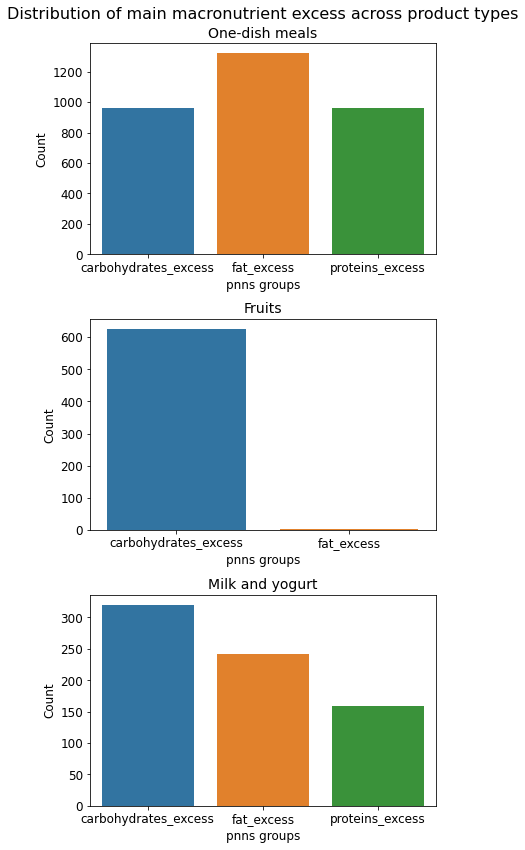

In [38]:
fs = 12
fig, axs = plt.subplots(nrows=X.pnns_groups_2.unique().size, figsize=(8, 12))
fig.suptitle("Distribution of main macronutrient excess across product types", fontsize=16)
for i, g in enumerate(X.pnns_groups_2.unique()):
    ax = axs[i]
    sns.countplot(x="max_excess", data=X[X.pnns_groups_2==g].sort_values(by="max_excess"), ax=ax)
    ax.set_xlabel("pnns groups", fontsize=fs)
    ax.set_ylabel("Count", fontsize=fs)
    ax.tick_params(axis='y', labelsize=fs)
    ax.tick_params(axis="x", labelsize=fs)
    ax.set_title(g, fontsize=14)
plt.tight_layout()
plt.gcf().subplots_adjust(left=0.2, right=0.8)
plt.savefig("./graphes/excess_foodgroups.png", dpi=300)
plt.show()

On a donc les associations suivantes:
- Les one-dish meals, les excès sont principalement des excès en lipides, puis en protéines et enfin en glucides
- Pour les fruits, les excès sont essentiellement des excès en glucides (les fruits sont des produits non gras, et ne contiennent pas ou peu de protéines)
- Enfin pour les milk and yogurt on a en premier lieu des excès en glucides (surement à cause des desserts sucrés), puis viennent les lipides et enfin les protéines.

# Conclusion

Le principe de fonctionnement repose essentiellement sur l'equiscore, qui permet de calculer l'écart d'une composition d'un produit à la composition idéale. Pour que l'application puisse fonctionner, il faut pouvoir "équilibrer" les apports d'un plat, avec les apports d'un autre plat. Or nous avons vu que les One-dish meals, les Fruits et les Milk and yogurt sont chacuns "spécialisés" dans un ou plusieurs macro-nutriment:
- les lipides et protéines en ce qui concerne les One-dish meals
- les glucides en ce qui concerne les fruits
- les glucides et les lipides en ce qui concerne les Milk and yogurt

Pour aller plus loin, on pourrait par exemple selectionner aléatoirement un one-dish meal, et à partir de sa composition décider si il faut lui adjoindre un fruit (carence en glucides) ou un yaourt (carence en lipides et/ou protéines) pour retrouver une meilleure composition. Il s'agira ensuite de calculer le nouvel equiscore et vérifier qu'il est bien inférieur au score initial. Enfin répéter cette opération un grand nombre de fois et vérifier à l'aide d'un test statistique approprié qu'on obtient obtient en moyenne de meilleurs equiscores avec les combinaisons proposées par l'app que sans l'app.

# -----------------------------------------------------------------

Démonstration de la pertinence d'utiliser une mesure de l'équilibre nutritionnel dans le cadre de l'application

In [287]:
X = df1.drop(columns=["energy-kcal_100g", "fat_100g", "carbohydrates_100g", "proteins_100g", "fiber_100g"]).copy()
np.random.seed(42)

# Création des datframe correspondants aux pnns groups
one_dish_meals = X[X.pnns_groups_2=="One-dish meals"]
fruits = X[X.pnns_groups_2=="Fruits"]
milk_yogurt  = X[X.pnns_groups_2=="Milk and yogurt"]
other = pd.concat([fruits, milk_yogurt])

# variables
nutri_vars = ["fat_kcal", 
              "carbohydrates_kcal", 
              "proteins_kcal"]
dessert_dict = {"random":0, "partial_random":1, "w_equiscore":2}

start_scores = []
nb_tirages = 1000
combinations_random = np.empty((nb_tirages, 4))
combinations_partial_random = np.empty((nb_tirages, 4))
combinations_w_equiscore = np.empty((nb_tirages, 4))


def add_food(base, dessert, dessert_type, dessert_dict, nutri_vars=nutri_vars):
    added = np.empty((1, 4))
    for i, nv in enumerate(nutri_vars):
        added[0, i] = base[nv].to_numpy() + dessert[nv].to_numpy()
    added[0, 3] = int(dessert_dict[dessert_type])
    return added

for i in range(0, nb_tirages):
    # Sélection aléatoire d'un plat
    base_product = one_dish_meals.sample(1)
    start_scores.append(base_product.score.to_numpy()[0])
    
    # Sélection d'un produit parmi "other"
    dessert_random = other.sample(1)
    added = add_food(base_product, dessert_random, "random", dessert_dict)
    combinations_random[i] = added
    
    # Sélection d'un produit parmi "fruits" ou "milk_yogurt selon la valeur de base_product["max_excess"]
    if (base_product["max_excess"].to_numpy()[0].count("fat")!=0) or (base_product["max_excess"].to_numpy()[0].count("proteins")!=0):
        dessert_partial_random = fruits.sample(1)
        added = add_food(base_product, dessert_partial_random, "partial_random", dessert_dict)
        combinations_partial_random[i] = added
    else:
        
        dessert_partial_random = milk_yogurt.sample(1)
        added = add_food(base_product, dessert_partial_random, "partial_random", dessert_dict)
        combinations_partial_random[i] = added
        
    # Sélection d'un produit parmi "fruits" ou "milk_yogurt" selon la valeur de base_product["max_excess"]
    # et appartenant au même groupe d'equiscore
    base_equiscore = base_product.equiscore.to_numpy()[0]
    if (base_product["max_excess"].to_numpy()[0].count("fat")!=0) or (base_product["max_excess"].to_numpy()[0].count("proteins")!=0):
        dessert_w_equiscore = fruits[fruits.equiscore==base_equiscore].sample(1)
        added = add_food(base_product, dessert_w_equiscore, "w_equiscore", dessert_dict)
        combinations_w_equiscore[i] = added
    else:
        dessert_w_equiscore = milk_yogurt[milk_yogurt.equiscore==base_equiscore].sample(1)
        added = add_food(base_product, dessert_w_equiscore, "w_equiscore", dessert_dict)
        combinations_w_equiscore[i] = added
        
    combinations = np.concatenate((combinations_random, combinations_partial_random, combinations_w_equiscore))
    combinations = pd.DataFrame(combinations, columns=["fat_kcal", "carbohydrates_kcal", "proteins_kcal", "combination_type"])
    combinations.head() 

sum_all = combinations[["fat_kcal","carbohydrates_kcal","proteins_kcal"]].sum(axis=1)

combinations["fat_ratio"] = 100*combinations["fat_kcal"]/sum_all
combinations["carbohydrates_ratio"] = 100*combinations["carbohydrates_kcal"]/sum_all
combinations["proteins_ratio"] = 100*combinations["proteins_kcal"]/sum_all

# calcul du score
combinations["score"] = fp3.score(combinations["fat_ratio"], combinations["carbohydrates_ratio"], combinations["proteins_ratio"], method="sq")
combinations["combination_type"] = combinations["combination_type"].astype("object")

# start_scores
start_scores = pd.Series(start_scores, name="start_scores")
combinations.head()

,fat_kcal,carbohydrates_kcal,proteins_kcal,combination_type,fat_ratio,carbohydrates_ratio,proteins_ratio,score
0,219.375,208.10,125.10,0,39.700493,37.660046,22.639461,9.226654
1,117.540,160.80,39.84,0,36.941354,50.537432,12.521214,7.467499
2,15.300,110.44,17.80,0,10.659050,76.940226,12.400725,42.031146
3,60.615,200.44,64.94,0,18.593843,61.485606,19.920551,25.200734
4,68.670,167.60,64.64,0,22.820777,55.697717,21.481506,18.594976


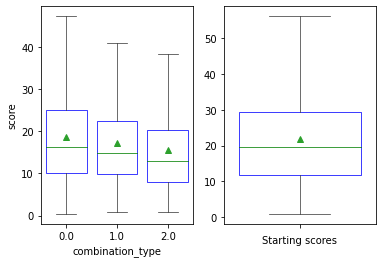

In [293]:
fig, (ax1, ax2) = plt.subplots(ncols=2)

boxprops = {"facecolor":"white", "edgecolor":"blue"}
medianprops = {"color": "green"}
arrowprops = {"arrowstyle":"fancy"}
sns.boxplot(data=combinations[["combination_type", "score"]], 
            y = "score",
            x = "combination_type",
            ax=ax1,
            linewidth=0.75, 
            boxprops=boxprops, 
            medianprops=medianprops,
            showfliers=False,
            showmeans=True)

sns.boxplot(data=start_scores, 
            #y = "score",
            #x = "combination_type",
            ax=ax2,
            linewidth=0.75, 
            boxprops=boxprops, 
            medianprops=medianprops,
            showfliers=False,
            showmeans=True)
ax2.set_xticklabels("")
ax2.set_xlabel("Starting scores")
#plt.axhline(start_scores[0], 0,1)
#plt.annotate("score initial", xy=(0.5,start_scores[0]), xytext=(0.5, 40), arrowprops=arrowprops)
plt.show()

In [283]:
combinations.groupby("combination_type").mean()["score"]

combination_type
0.0    18.600167
1.0    17.157662
2.0    15.450510
Name: score, dtype: float64

In [294]:
mod = ols('score ~ combination_type', data=combinations.dropna(subset=["combination_type", "score"], how="any")).fit()           
aov_table = sm.stats.anova_lm(mod, typ=2)
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print("Résultats de l'analyse ANOVA pour les variables score et combination_type:")
print("F: {:.2f}, p: {:.3f}".format(aov_table.iloc[0]["F"], aov_table.iloc[0]["PR(>F)"]))
print("Eta-squared: {:.4f}".format(esq_sm))

Résultats de l'analyse ANOVA pour les variables score et combination_type:
F: 22.36, p: 0.000
Eta-squared: 0.0147
